In [32]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [34]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data)
pd.DataFrame(df_market_data_scaled).hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [7]:
# Create a DataFrame with the scaled data
df_scaled_data = pd.DataFrame(df_market_data_scaled)

# Copy the crypto names from the original DataFrame
df_scaled_data.columns = df_market_data.columns

# Set the coin_id column as index
df_scaled_data.index = df_market_data.index

# Display the scaled DataFrame
df_scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_scaled_data)
    inertia.append(k_model.inertia_)

In [35]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "Inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head()

,k,Inertia
0,1,287.065254
1,2,198.908757
2,3,119.265795
3,4,43.225967
4,5,32.971966


<Axes: xlabel='k'>

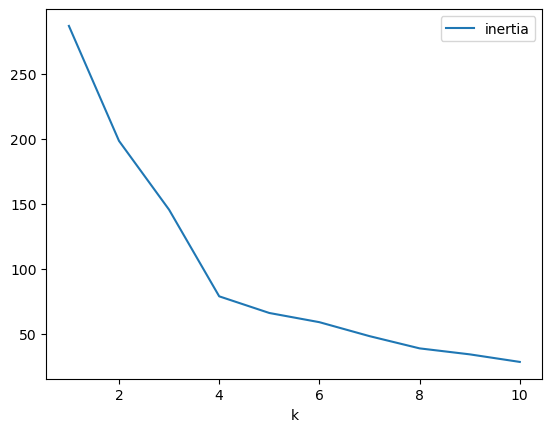

In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.set_index('k').plot()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4** 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
best_model = KMeans(4)

# Fit the K-Means model using the scaled DataFrame
best_model.fit(df_scaled_data)


KMeans(n_clusters=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = best_model.predict(df_scaled_data)

# Print the resulting array of cluster values.
clusters

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 0, 1, 1, 1, 1])

In [14]:
# Create a copy of the scaled DataFrame
df_copy = df_scaled_data.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_copy["clusters"] = clusters

# Display the copy of the scaled DataFrame
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    color='clusters',
    hover_cols ='coin_id',
    width=800,
    height=400,
    rot=90
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
scaled_data_pca = pca.fit_transform(df_copy)

# View the scaled PCA data
scaled_data_pca[:10]

array([[-1.17926783,  0.85590257,  0.77775079],
       [-1.01150635,  0.61005923,  1.28474948],
       [-0.10765565, -0.48617566, -0.87984088],
       [-0.15000485, -0.5312664 , -0.75184656],
       [-2.22277596,  1.92712382,  1.41817664],
       [-1.30422236,  1.42601134,  0.91307055],
       [-1.28891537,  0.88764573,  2.71445886],
       [-1.05835499,  0.95852842,  1.63455145],
       [-1.12882615,  0.47869933,  0.98393534],
       [-0.45787798, -0.57830948, -0.60690024]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.33701665, 0.31346749, 0.2341213 ])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [20]:
# Create a new DataFrame with the PCA data.
pca_data_df = pd.DataFrame(scaled_data_pca, columns=["PCA1", "PCA2", "PCA3"])
# Copy the crypto names from the original scaled DataFrame
pca_data_df['coin_id'] = df_market_data.index

# Set the coin_id column as index
pca_data_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
pca_data_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-1.179268,0.855903,0.777751
ethereum,-1.011506,0.610059,1.284749
tether,-0.107656,-0.486176,-0.879841
ripple,-0.150005,-0.531266,-0.751847
bitcoin-cash,-2.222776,1.927124,1.418177


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [22]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(pca_data_df)
    inertia.append(k_model.inertia_)

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.065254
1,2,198.908757
2,3,119.265795
3,4,43.225967
4,5,32.971966


<Axes: title={'center': 'Elbow Method for Optimal k'}, xlabel='Number of Clusters (k)', ylabel='Inertia'>

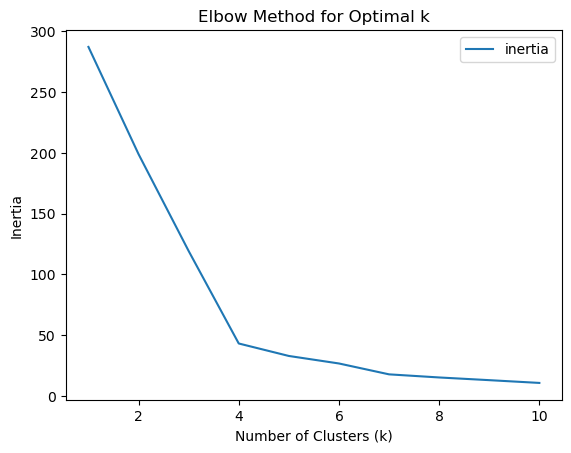

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.set_index('k').plot(title='Elbow Method for Optimal k', xlabel='Number of Clusters (k)', ylabel="Inertia" )

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
# Initialize the K-Means model using the best value for k
best_value_model = KMeans(n_clusters=3, random_state=0)

In [26]:
# Fit the K-Means model using the PCA data
best_value_model.fit(pca_data_df)

KMeans(n_clusters=3, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
k_3 = best_value_model.predict(pca_data_df) 

# Print the resulting array of cluster values.
k_3

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0])

In [28]:
# Create a copy of the scaled PCA DataFrame
pca_data_predictions_df = pca_data_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_data_predictions_df["Cluster"] = k_3

# Display the copy of the scaled PCA DataFrame
pca_data_predictions_df.head()

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-1.179268,0.855903,0.777751,2
ethereum,-1.011506,0.610059,1.284749,2
tether,-0.107656,-0.486176,-0.879841,0
ripple,-0.150005,-0.531266,-0.751847,0
bitcoin-cash,-2.222776,1.927124,1.418177,2


In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_plot = pca_data_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="Cluster",
    hover_cols=["coin_id"]
)
pca_plot

:NdOverlay   [Cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves
# Function to calculate inertia values
def calculate_inertia(data, k_range):
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia
    
# Calculate inertia for both datasets    
k_range = range(1, 12)
original_inertia = calculate_inertia(df_market_data, k_range)
pca_inertia = calculate_inertia(pca_data_predictions_df, k_range)

# Create DataFrames for plotting
original_inertia_df = pd.DataFrame({'k': k_range, 'Inertia': original_inertia})
pca_inertia_df = pd.DataFrame({'k': k_range, 'Inertia': pca_inertia})

# Create elbow curves
original_plot = original_inertia_df = original_inertia_df.hvplot.line(x='k', y='Inertia', label='Original Data', title='Elbow Method Comparison')
pca_plot = pca_inertia_df.hvplot.line(x='k', y='Inertia', label='PCA DATA').opts(xlabel='Number of Clusters (k)', ylabel='Inertia')

# Combine the plots
composite_plot = original_plot + pca_plot

# Display the composite plot
composite_plot

:Layout
   .Curve.Original_Data :Curve   [k]   (Inertia)
   .Curve.PCA_DATA      :Curve   [k]   (Inertia)

In [31]:
# Composite plot to contrast the clusters
# Create scatter plots for the original scaled DataFrame
original_clusters_plot = df_scaled_data.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='coin_id',
    title='Original Scaled Data Clusters'
)

# Create scatter plots for the PCA scaled DataFrame
pca_clusters_plot = pca_data_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='coin_id',
    title='PCA Scaled Data Clusters'
)

# Combine the plots
composite_plot = original_clusters_plot + pca_clusters_plot

# Display the composite plot
composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [coin_id]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [coin_id]
      :Scatter   [PCA1]   (PCA2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The use of PCA to reduce the features to three principal components explained 89.5% of the variance. This indicates the reduced feature set still captures most of the important information, allowing for effective clustering.